In [1]:
import pandas as pd
for i in range(8):
    df = pd.read_excel('mt.xlsx',i)
    df = df.reset_index()  # make sure indexes pair with number of rows

    with open(r'a.cls', 'r', encoding='UTF-8') as file:
        data = file.read()
        for index, row in df.iterrows():
            if(isinstance(row[1],int)):
                x='<name>{}{}</name>'.format(row[1]%100,row[2])
                y='<name>192.168.19.{}</name>'.format(row[1]%100)
                data = data.replace(y, x)
        with open(r'8{}en.cls'.format(i+1), 'w', encoding='UTF-8') as file:
            file.write(data)
    print("Text replaced")



Text replaced
Text replaced
Text replaced
Text replaced
Text replaced
Text replaced
Text replaced


ValueError: Worksheet index 7 is invalid, 7 worksheets found

In [8]:
import xml.etree.ElementTree as ET
from openpyxl import Workbook

# 创建一个新的工作簿和工作表
wb = Workbook()
ws = wb.active

# 解析XML文件
tree = ET.parse('4n.cls')
root = tree.getroot()

# 储存所有学生的信息和位置
students = []

# 遍历所有的学生元素，收集姓名和坐标位置
for student in root.find('students'):
    name = student.find('name').text
    x_pos = int(student.find('posThumb').attrib['x'])
    y_pos = int(student.find('posThumb').attrib['y'])
    students.append((name, x_pos, y_pos))

# 基于学生的y值分组，y值相差不超过15的认为是同一组
def group_students_by_y(students, y_threshold=15):
    sorted_students = sorted(students, key=lambda student: student[2])
    groups = []
    current_group = []
    current_y = sorted_students[0][2]
    
    for student in sorted_students:
        if abs(student[2] - current_y) <= y_threshold:
            current_group.append(student)
        else:
            groups.append(current_group)
            current_group = [student]
            current_y = student[2]
            
    # 添加最后一组
    groups.append(current_group)
    
    return groups

# 分组学生
student_groups = group_students_by_y(students)

# 将学生填入Excel
excel_row = 1
for group in student_groups:
    group.sort(key=lambda student: student[1])  # 按x排序
    excel_col = 1
    for name, _, _ in group:
        ws.cell(row=excel_row, column=excel_col, value=name)
        excel_col += 1
    excel_row += 1

# 保存Excel文件
wb.save('seating_chart.xlsx')

In [13]:
import xml.etree.ElementTree as ET
from openpyxl import Workbook
import glob
import os
def set_cell_dimensions(ws, char_count=12):
    # 通常Excel列宽是按字符数计算的，这里设置为12个标准Excel字符的宽度
    approx_char_size = 1.2  # 根据Excel的默认字体和大小进行定量
    column_width = char_count * approx_char_size
    row_height = char_count * 1.2  # 这里假设行高也足以包含12个字符
    
    for col in ws.iter_cols():
        for cell in col:
            cell.column_dimensions[col.column_letter].width = column_width

    for row in ws.iter_rows():
        for cell in row:
            cell.row_dimensions[row.row].height = row_height
            
def group_students_by_y(students, y_threshold=15):
    sorted_students = sorted(students, key=lambda student: student[2])
    groups = []
    current_group = []
    current_y = sorted_students[0][2]
    
    for student in sorted_students:
        if abs(student[2] - current_y) <= y_threshold:
            current_group.append(student)
        else:
            groups.append(current_group)
            current_group = [student]
            current_y = student[2]
            
    # 添加最后一组
    groups.append(current_group)
    return groups

# 枚举当前目录下的所有.cls文件
for cls_file in glob.glob('*.cls'):
    tree = ET.parse(cls_file)
    root = tree.getroot()

    students = []

    for student in root.find('students'):
        name = student.find('name').text
        x_pos = int(student.find('posThumb').attrib['x'])
        y_pos = int(student.find('posThumb').attrib['y'])
        students.append((name, x_pos, y_pos))

    student_groups = group_students_by_y(students)

    # 创建工作簿和工作表
    wb = Workbook()
    ws = wb.active
    set_cell_dimensions(ws, char_count=20)  # 用新的设置尺寸函数调整单元格的大小

    # 将学生填入表格
    excel_row = 1
    for group in student_groups:
        group.sort(key=lambda student: student[1])  # 按x排序
        excel_col = 1
        for name, _, _ in group:
            ws.cell(row=excel_row, column=excel_col, value=name)
            excel_col += 1
        excel_row += 1

    # 保存为同名的xlsx文件
    excel_filename = f"{os.path.splitext(cls_file)[0]}.xlsx"
    wb.save(excel_filename)

In [15]:
import xml.etree.ElementTree as ET
from openpyxl import Workbook
import openpyxl.utils
import glob
import os

def set_cell_dimensions(ws, char_count=12):
    # 设置列宽和行高为20个字符的宽度
    approx_char_size = 1  # 根据Excel的默认字体和大小进行定量
    column_width = char_count * approx_char_size
    row_height = char_count * 3  # 行高也设置为相同的大小
    
    # 设置所有列的宽度
    for col in range(1, ws.max_column + 1):
        col_letter = openpyxl.utils.get_column_letter(col)
        ws.column_dimensions[col_letter].width = column_width

    # 设置所有行的高度
    for row in range(1, ws.max_row + 1):
        ws.row_dimensions[row].height = row_height

def group_students_by_y(students, y_threshold=15):
    sorted_students = sorted(students, key=lambda student: student[2])
    groups = []
    current_group = []
    current_y = sorted_students[0][2]
    
    for student in sorted_students:
        if abs(student[2] - current_y) <= y_threshold:
            current_group.append(student)
        else:
            groups.append(current_group)
            current_group = [student]
            current_y = student[2]
            
    # 添加最后一组
    groups.append(current_group)
    return groups

# 枚举当前目录下的所有.cls文件
for cls_file in glob.glob('*.cls'):
    tree = ET.parse(cls_file)
    root = tree.getroot()

    students = []

    for student in root.findall('.//student'):  # 路径根据实际的XML结构调整
        name = student.find('name').text
        x_pos = int(student.find('posThumb').attrib['x'])
        y_pos = int(student.find('posThumb').attrib['y'])
        students.append((name, x_pos, y_pos))

    student_groups = group_students_by_y(students)

    # 创建工作簿和工作表
    wb = Workbook()
    ws = wb.active

    # 将学生填入表格
    excel_row = 1
    for group in student_groups:
        group.sort(key=lambda student: student[1])  # 按x排序
        excel_col = 1
        for name, _, _ in group:
            ws.cell(row=excel_row, column=excel_col, value=name)
            excel_col += 1
        excel_row += 1

    # 调整单元格大小，确保所有数据已填入
    set_cell_dimensions(ws, char_count=20)

    # 保存为同名的xlsx文件
    excel_filename = f"{os.path.splitext(cls_file)[0]}.xlsx"
    wb.save(excel_filename)

/tmp/ipykernel_129486/56532014.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_129486/56532014.py:22: UserWarning: Glyph 25484 (\N{CJK UNIFIED IDEOGRAPH-638C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_129486/56532014.py:22: UserWarning: Glyph 25569 (\N{CJK UNIFIED IDEOGRAPH-63E1}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_129486/56532014.py:22: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_129486/56532014.py:22: UserWarning: Glyph 35782 (\N{CJK UNIFIED IDEOGRAPH-8BC6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_129486/56532014.py:22: UserWarning: Glyph 38382 (\N{CJK UN

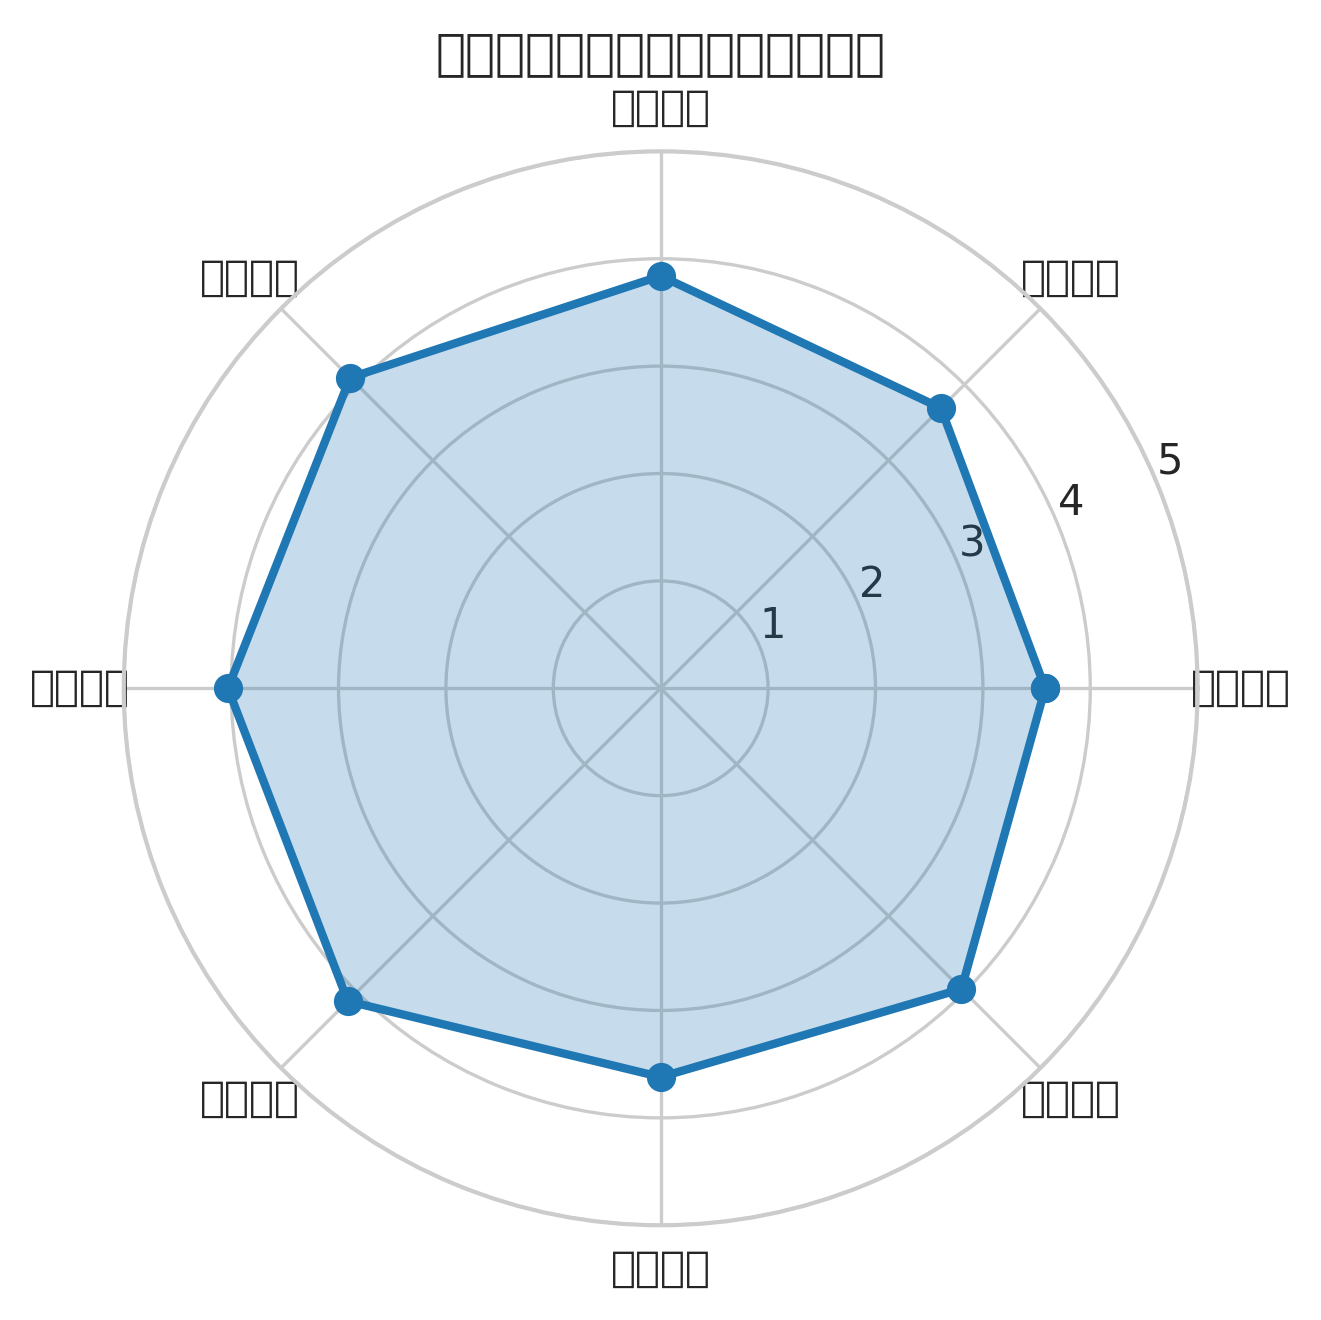

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 数据
labels = np.array(['掌握知识', '问题解决', '创新思维', '沟通能力',
                   '合作能力', '责任担当', '学习投入', '学术心志'])
values = np.array([3.58, 3.69, 3.84, 4.09, 4.03, 4.12, 3.62, 3.96])
values = np.concatenate((values, [values[0]]))  # 闭合图形

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# 2. 画图
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(4.5, 4.5), dpi=300)
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2, color='#1f77b4')
ax.fill(angles, values, alpha=0.25, color='#1f77b4')
ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels, fontsize=10)
ax.set_ylim(0, 5)
ax.set_title('初中生信息科技深度学习能力画像', size=12, pad=20)
plt.tight_layout()
plt.savefig('radar_student.png', dpi=300, bbox_inches='tight')
plt.show()